In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy  as np
import glob
import matplotlib.animation as animation

- Choosing the correct upper and lower HSV boundaries for color detection with`cv::inRange` (OpenCV)
- OpenCV uses H: 0-179, S: 0-255, V: 0-255
- 

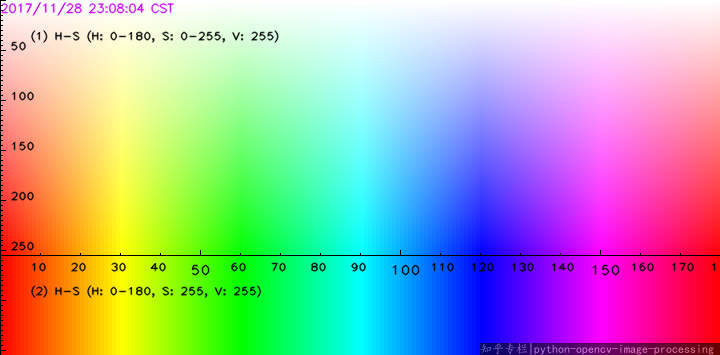

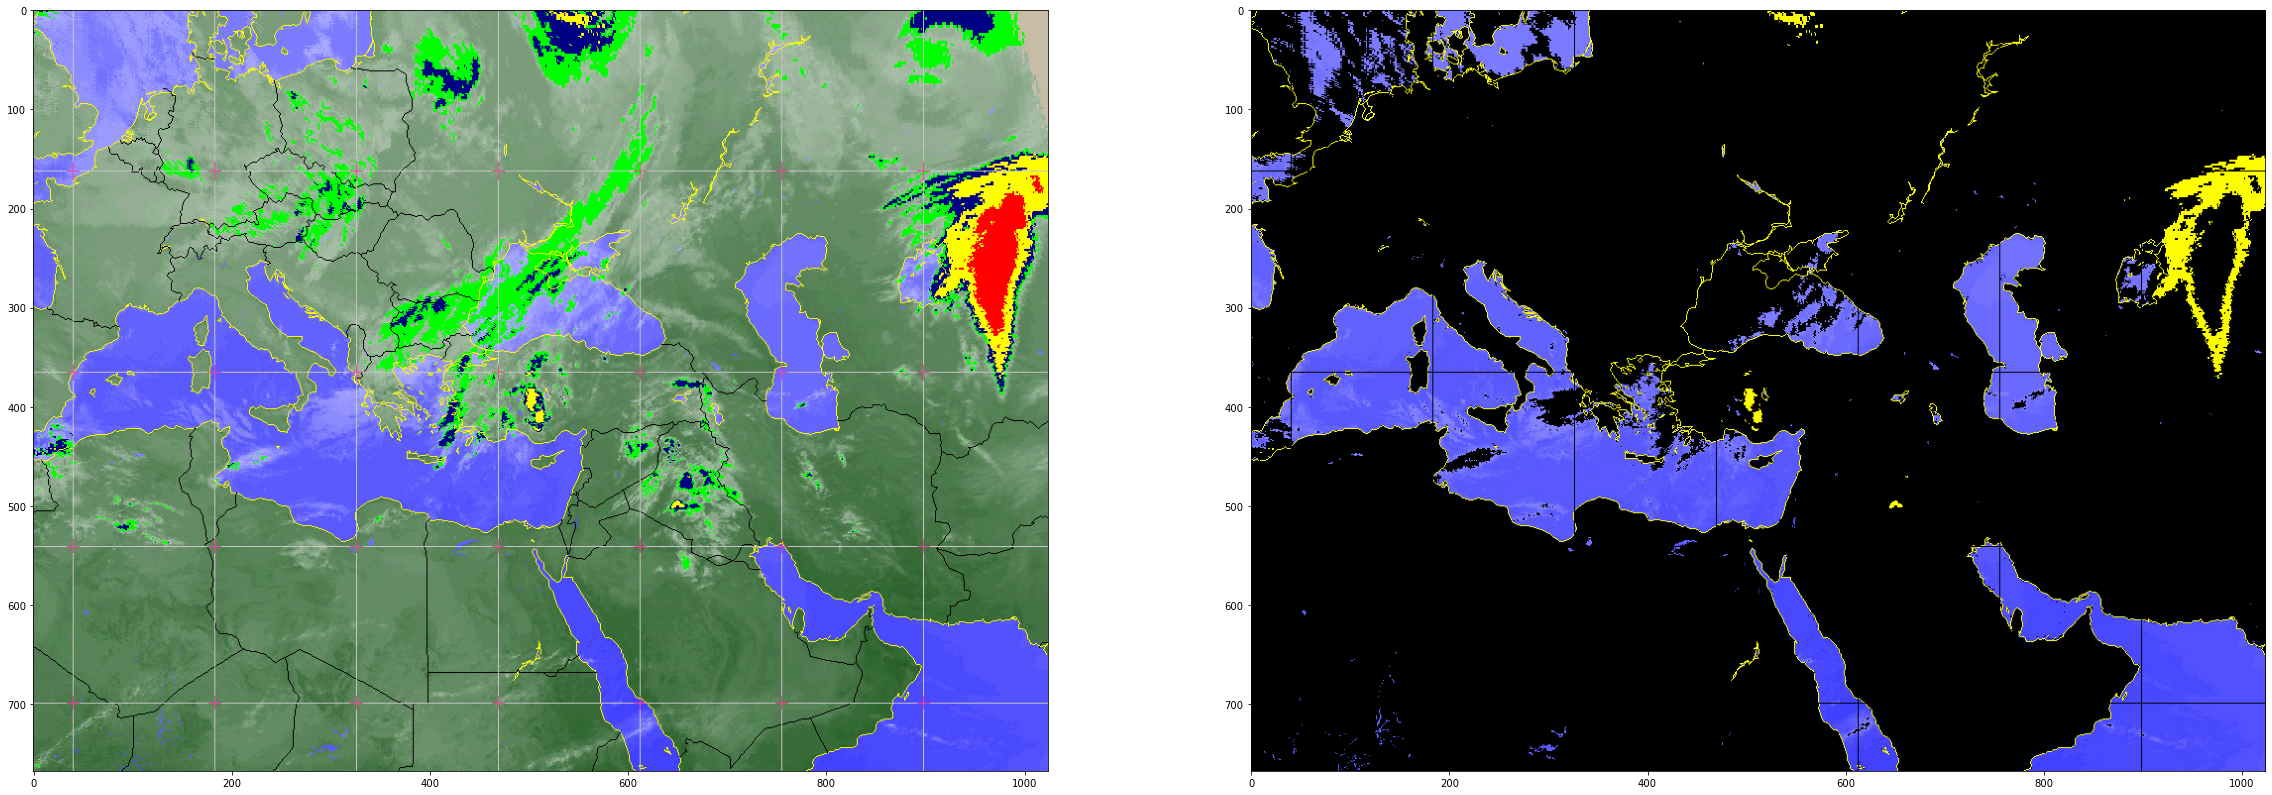

In [24]:
images=[]
frames = []

#for img in glob.glob('satpic1/*.jpg'):
#path='satpic1/202107142115.jpg'
path='satpic1/test2.jpg'
img=cv2.imread(path,1)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
hsv_img=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
#Define threshold color range to filter
#mask = cv2.inRange(hsv_img, (10,0,0), (25, 255, 255))
mask1 = cv2.inRange(hsv_img, (25,150,0), (35, 255, 255))
mask2 = cv2.inRange(hsv_img, (110,120,0), (125, 200, 255))
## final mask and masked
mask = cv2.bitwise_or(mask1, mask2)
# Bitwise-AND mask and original image
res = cv2.bitwise_and(hsv_img, hsv_img, mask=mask)
res1=cv2.cvtColor(res,cv2.COLOR_HSV2RGB)
ratio = cv2.countNonZero(mask)/(hsv_img.size/3)

#print('pixel percentage:', np.round(ratio*100, 2))
plt.clf()
plt.close()
plt.figure(figsize=(40,40))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(res1)

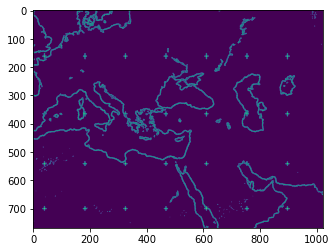

In [6]:
grayimage=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
edge=cv2.Canny(grayimage,240,250)
contours, hierarchy=cv2.findContours(edge,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

plt.imshow(edge)

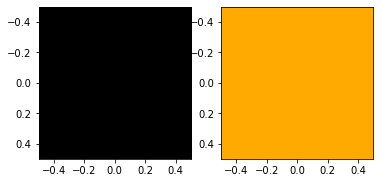

In [8]:
color1 = np.uint8([[[10,0,0]]]) 
color1=cv2.cvtColor(color1,cv2.COLOR_HSV2RGB)
color2 = np.uint8([[[20, 255, 255]]])
color2=cv2.cvtColor(color2,cv2.COLOR_HSV2RGB)
plt.subplot(1,2,1)
plt.imshow(color1)
plt.subplot(1,2,2)
plt.imshow(color2)